# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:
sensor = pd.read_csv('sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
print(sensor.isnull().sum())

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64


How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:
start_time = '2018-01-01 00:00:00'
end_time = '2018-01-01 00:29:10'
num_rows = len(sensor)

index = pd.date_range(start=start_time, end=end_time, periods=num_rows)
sensor.index = index

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:
sensor.index = index

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

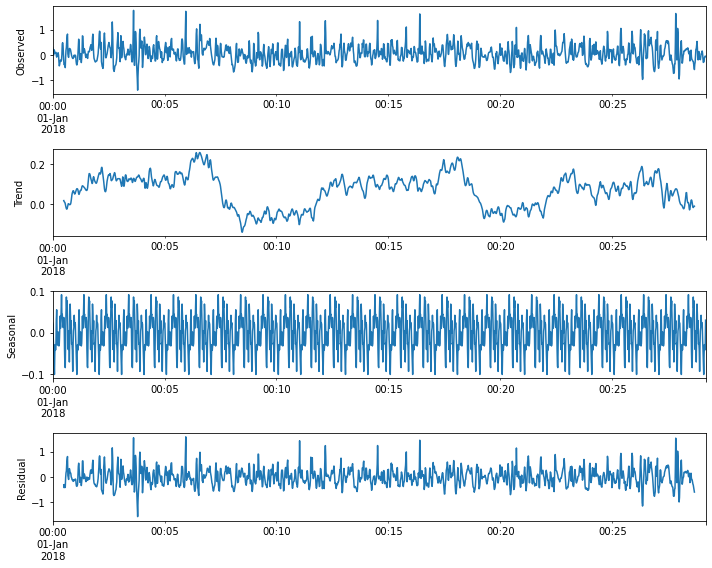

In [10]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

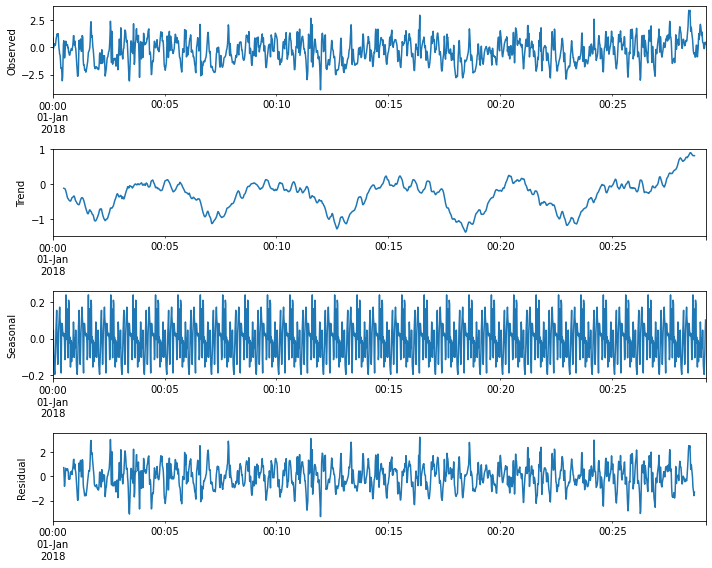

In [11]:
decomposition2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period=60)

# Plot the decomposed plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))
decomposition2.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition2.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition2.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition2.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

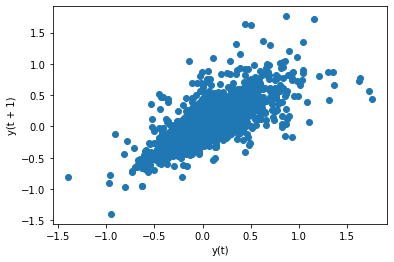

In [12]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])
plt.show()

Create a lag plot for `rotationRate.x`

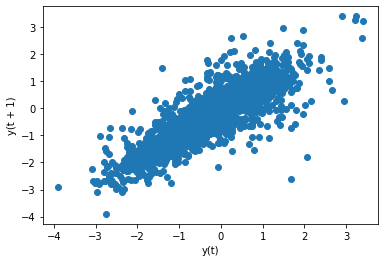

In [13]:
# Your code here:
lag_plot(sensor['rotationRate.x'])
plt.show()

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:



The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [14]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

result_acc = adfuller(sensor['userAcceleration.x'])
print('ADF Statistic for userAcceleration.x:', result_acc[0])
print('p-value for userAcceleration.x:', result_acc[1])
print('Critical Values for userAcceleration.x:')
for key, value in result_acc[4].items():
    print('\t{}: {}'.format(key, value))

result_rot = adfuller(sensor['rotationRate.x'])
print('ADF Statistic for rotationRate.x:', result_rot[0])
print('p-value for rotationRate.x:', result_rot[1])
print('Critical Values for rotationRate.x:')
for key, value in result_rot[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic for userAcceleration.x: -17.95799408616976
p-value for userAcceleration.x: 2.823439483037483e-30
Critical Values for userAcceleration.x:
	1%: -3.434100824760071
	5%: -2.863196780129223
	10%: -2.5676520210882936
ADF Statistic for rotationRate.x: -5.2698606250864195
p-value for rotationRate.x: 6.320230335912249e-06
Critical Values for rotationRate.x:
	1%: -3.4341465551936534
	5%: -2.863216966926812
	10%: -2.567662770090317


What are your conclusions from this test?

In [17]:
# Your conclusions here:
# userAcceleration.x y rotationRate.x son time series estacionarias 

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [18]:
# Your code here:
import statsmodels.api as sm

train_data = sensor.iloc[:-10]['userAcceleration.x']
test_data = sensor.iloc[-10:]['userAcceleration.x']

model = sm.tsa.AutoReg(train_data, lags=2, trend='c', seasonal=False, exog=None, hold_back=None)
results = model.fit()

print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                     AutoReg(2)   Log Likelihood                 365.937
Method:               Conditional MLE   S.D. of innovations              0.196
Date:                Wed, 29 Mar 2023   AIC                           -723.875
Time:                        02:24:09   BIC                           -702.030
Sample:                    01-01-2018   HQIC                          -715.797
                         - 01-01-2018                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0226      0.005      4.726      0.000       0.013       0.032
userAcceleration.x.L1     1.1271      0.021     53.721      0.000       1.086       1.168
userAcce

C:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [22]:
# Your code here:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

train_data = sensor.iloc[:-10]['userAcceleration.x']
test_data = sensor.iloc[-10:]['userAcceleration.x']

model = sm.tsa.AutoReg(train_data, lags=2, trend='c', seasonal=False, exog=None, hold_back=None)
results = model.fit()

# Make predictions for the last 10 rows of the data
predictions = results.predict(start=len(train_data), end=len(sensor['userAcceleration.x'])-1, dynamic=False)

# Compute the RMSE between the predicted and observed data
rmse_val = rmse(predictions, test_data)
print(f"RMSE: {rmse_val:.4f}")

RMSE: 0.2230


C:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
C:\ANACONDA\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
